In [1]:
%matplotlib inline

import sys,os
#sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
sys.path.append('C:/Users/akirker/OneDrive - Virginia Tech/ATS Paper')
sys.path.append('C:/ProgramData/anaconda3/Lib/site-packages')
print(sys.path)
#import ats_xdmf
#import colors
import numpy as np
import matplotlib
import scipy
import scipy.stats
from matplotlib import pyplot as plt
#from matplotlib import col
import pandas
from datetime import datetime, date, timedelta
import matplotlib.dates as mdates
import h5py
from matplotlib import gridspec
import shapely
import shapely.geometry
#import fiona
from scipy.optimize import curve_fit

#Color Blind Safe Category Colors
#1b9e77 - Wetland
#d95f02 - Incised
#7570b3 - Typical

['C:\\Users\\akirker\\OneDrive - Virginia Tech\\ATS Paper\\CodeForFigures', 'C:\\ProgramData\\anaconda3\\python312.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\Lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\Users\\akirker\\AppData\\Roaming\\Python\\Python312\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor', 'C:/Users/akirker/OneDrive - Virginia Tech/ATS Paper', 'C:/ProgramData/anaconda3/Lib/site-packages']


In [2]:
directory = "~/OneDrive - Virginia Tech/ATS Paper/Raw Data"

In [3]:
#HGU sizes in square meters

southIncised_size = 14371.71 # 45%
southTyp_size = 5674.57
southWet_size = 11700.50
all_south_HGF = 31746.78 # 

largeIncised1_size = 16044.52 # 44%
largeWet_size = 15386.22
largeTyp_size = 5110.05
all_large_HGF = 36540.79

northTyp1_size = 8188.58
northTyp2_size = 2193.07
northWet_size = 7254.86
all_north_HGF = 18149.51

southWat_size = 118456.04
largeWat_size = 264960.39
northWat_size = 110165.0

In [4]:
#South HGUs Data

southOutput = pandas.read_csv(os.path.join(directory, 'southHGUs.dat'), comment='#').iloc[36:]

south_times = southOutput["time [s]"][:]

#Get Times
start = datetime.strptime('2016-01-01 00:00:00','%Y-%m-%d %H:%M:%S')
ts = datetime.timestamp(start)

reslist = []
for sec in south_times:
    res_date = ts + sec
    res = datetime.fromtimestamp(res_date)
    reslist.append(res)

southOutput["DateTime"] = reslist
southOutput = southOutput.set_index('DateTime')
southOutput = southOutput.loc['2017-02-27':'2018-01-10']


#Convert Outflow mol/h to m3/s
southIncised_out = southOutput["South Incised Reach Outflow [mol/h]"][:]/(55600.)
southTyp_out = southOutput["South Typical Reach Outflow [mol/h]"][:]/(-55600.)
southWet_out = southOutput["South Wet Reach Outflow [mol/h]"][:]/(-55600.)

#Convert Inflow mol/h to m3/s
southIncised_in = southOutput["South Typical Reach Outflow [mol/h]"][:]/(-55600.)
southTyp_in = southOutput["South Wet Reach Outflow [mol/h]"][:]/(-55600.)
southWet_in = 0

#Divide Inflow by upstream area
#southIncised_in_norm = southIncised_in/southIncised_shed
#southTyp_in_norm = southTyp_in/southTyp_shed
#southWet_in_norm = southWet_in/southWet_shed

southIncised_depth = -southOutput["South Incised Reach Depth to Water [m]"][:]
southTyp_depth = -southOutput["South Typical Reach Depth to Water [m]"][:]
southWet_depth = -southOutput["South Wet Reach Depth to Water [m] "][:]

southIncised_sat = southOutput["South Incised Reach Saturation"][:]
southTyp_sat = southOutput["South Typical Reach Saturation"][:]
southWet_sat = southOutput["South Wet Reach Saturation"][:]

#Convert Exfiltration mol/h to m3/h
southIncised_exfil = southOutput["South Incised Reach Exfiltration [mol/h]"][:]/(55600.)
southTyp_exfil = southOutput["South Typical Reach Exfiltration [mol/h]"][:]/(55600.)
southWet_exfil = southOutput["South Wet Reach Exfiltration [mol/h]"][:]/(55600.)

#Get flow at flume
southFlume_out = southOutput["South Flume Outflow [mol/h]"][:]/(-55600.*3600)



In [5]:
#Large HGUs Data

largeOutput = pandas.read_csv(os.path.join(directory, 'centralHGUs.dat'), comment='#').iloc[36:]

large_times = largeOutput["time [s]"][:]

#Get Times
start = datetime.strptime('2016-01-01 00:00:00','%Y-%m-%d %H:%M:%S')
ts = datetime.timestamp(start)

reslist = []
for sec in large_times:
    res_date = ts + sec
    res = datetime.fromtimestamp(res_date)
    reslist.append(res)

largeOutput["DateTime"] = reslist
largeOutput = largeOutput.set_index('DateTime')
largeOutput = largeOutput.loc['2017-02-27':'2018-01-10']


#Convert Outflow mol/h to m3/s
largeIncised1_out = largeOutput["Central Incised1 Reach Outflow [mol/h]"][:]/(-55600.)
largeTyp_out = largeOutput["Central Typical Reach Outflow [mol/h]"][:]/(-55600.)
largeWet_out = largeOutput["Central Wet Reach Outflow [mol/h]"][:]/(55600.)

#Convert Inflow mol/h to m3/s
largeIncised1_in = largeOutput["Central Wet Reach Outflow [mol/h]"][:]/(-55600.)
largeTyp_in = 0
largeWet_in = largeOutput["Central Typical Reach Outflow [mol/h]"][:]/(-55600.)

#Divide Inflow by upstream area
#largeIncised_in_norm = largeTyp_out/largeIncised_shed
#largeTyp_in_norm = largeTyp_in/largeTyp_shed
#largeWet_in_norm = largeWet_in/largeWet_shed

largeIncised1_depth = -largeOutput["Central Incised1 Reach Depth to Water [m]"][:]
largeTyp_depth = -largeOutput["Central Typical Reach Depth to Water [m]"][:]
largeWet_depth = -largeOutput["Central Wet Reach Depth to Water [m] "][:]

largeIncised1_sat = largeOutput["Central Incised1 Reach saturation"][:]
largeTyp_sat = largeOutput["Central Typical Reach Saturation"][:]
largeWet_sat = largeOutput["Central Wet Reach Saturation "][:]

#Convert Exfiltration mol/h to m3/h
largeIncised1_exfil = largeOutput["Central Incised1 Reach Exfiltration [mol/h]"][:]/(55600.)
largeTyp_exfil = largeOutput["Central Typical Reach Exfiltration [mol/h]"][:]/(55600.)
largeWet_exfil = largeOutput["Central Wet Reach Exfiltration [mol/h]"][:]/(55600.)



#Get flow at flume
largeFlume_out = largeOutput["Central Flume Outflow [mol/h]"][:]/(-55600.*3600)

In [6]:
#North HGUs Data

northOutput = pandas.read_csv(os.path.join(directory, 'northHGUs.dat'), comment='#').iloc[36:]

north_times = northOutput["time [s]"][:]

#Get Times
start = datetime.strptime('2016-01-01 00:00:00','%Y-%m-%d %H:%M:%S')
ts = datetime.timestamp(start)

reslist = []
for sec in north_times:
    res_date = ts + sec
    res = datetime.fromtimestamp(res_date)
    reslist.append(res)

northOutput["DateTime"] = reslist
northOutput = northOutput.set_index('DateTime')
northOutput = northOutput.loc['2017-02-27':'2018-01-10']

#Convert Outflow mol/h to m3/s
northTyp1_out = northOutput["North Typical1 Reach Outflow [mol/h]"][:]/(55600.)
northTyp2_out = northOutput["North Typical2 Reach Outflow [mol/h]"][:]/(-55600.)
northWet_out = northOutput["North Wet Reach Outflow [mol/h]"][:]/(-55600.)


#Convert Inflow mol/h to m3/s
northTyp1_in = northOutput["North Wet Reach Outflow [mol/h]"][:]/(-55600.)
northTyp2_in = 0
northWet_in = northOutput["North Typical2 Reach Outflow [mol/h]"][:]/(-55600.)

#Divide Inflow by upstream area
#northTyp_in_norm = northTyp_in/northTyp_shed
#northWet_in_norm = northWet_in/northWet_shed



northTyp1_depth = -northOutput["North Typical1 Reach Depth to Water [m]"][:]
northTyp2_depth = -northOutput["North Typical2 Reach Depth to Water [m]"][:]
northWet_depth = -northOutput["North Wet Reach Depth to Water [m] "][:]

northTyp1_sat = northOutput["North Typical1 Reach Saturation"][:]
northTyp2_sat = northOutput["North Typical2 Reach Saturation"][:]
northWet_sat = northOutput["North Wet Reach Saturation"][:]

#Convert Exfiltration mol/h to m3/h
northTyp1_exfil = northOutput["North Typical1 Reach Exfiltration [mol/h]"][:]/(55600.)
northTyp2_exfil = northOutput["North Typical2 Reach Exfiltration [mol/h]"][:]/(55600.)
northWet_exfil = northOutput["North Wet Reach Exfiltration [mol/h]"][:]/(55600.)


#Calculate Hillslope Surface flow as Generated Flow minus Exfiltration

In [7]:
#Get change in storage in millimeters
southIncised_exfil_mm = (southIncised_exfil/southIncised_size)*1000
southTyp_exfil_mm = (southTyp_exfil/southTyp_size)*1000
southWet_exfil_mm = (southWet_exfil/southWet_size)*1000

largeIncised1_exfil_mm = (largeIncised1_exfil/largeIncised1_size)*1000
largeTyp_exfil_mm = (largeTyp_exfil/largeTyp_size)*1000
largeWet_exfil_mm = (largeWet_exfil/largeWet_size)*1000

northTyp1_exfil_mm = (northTyp1_exfil/northTyp1_size)*1000
northTyp2_exfil_mm = (northTyp2_exfil/northTyp2_size)*1000
northWet_exfil_mm = (northWet_exfil/northWet_size)*1000

#Calculate Daily Change in Storage (gain/loss) for each reach
southIncised_exfil_daily = pandas.DataFrame(southIncised_exfil_mm)
southIncised_exfil_daily = southIncised_exfil_daily.resample('D').sum()
southIncised_exfil_daily = southIncised_exfil_daily.rename(columns={'South Incised Reach Exfiltration [mol/h]':'a'})

southTyp_exfil_daily = pandas.DataFrame(southTyp_exfil_mm)
southTyp_exfil_daily = southTyp_exfil_daily.resample('D').sum()
southTyp_exfil_daily = southTyp_exfil_daily.rename(columns={'South Typical Reach Exfiltration [mol/h]':'a'})

southWet_exfil_daily = pandas.DataFrame(southWet_exfil_mm)
southWet_exfil_daily = southWet_exfil_daily.resample('D').sum()
southWet_exfil_daily = southWet_exfil_daily.rename(columns={'South Wet Reach Exfiltration [mol/h]':'a'})

largeIncised1_exfil_daily = pandas.DataFrame(largeIncised1_exfil_mm)
largeIncised1_exfil_daily = largeIncised1_exfil_daily.resample('D').sum()
largeIncised1_exfil_daily = largeIncised1_exfil_daily.rename(columns={'Central Incised1 Reach Exfiltration [mol/h]':'a'})

largeTyp_exfil_daily = pandas.DataFrame(largeTyp_exfil_mm)
largeTyp_exfil_daily = largeTyp_exfil_daily.resample('D').sum()
largeTyp_exfil_daily = largeTyp_exfil_daily.rename(columns={'Central Typical Reach Exfiltration [mol/h]':'a'})

largeWet_exfil_daily = pandas.DataFrame(largeWet_exfil_mm)
largeWet_exfil_daily = largeWet_exfil_daily.resample('D').sum()
largeWet_exfil_daily = largeWet_exfil_daily.rename(columns={'Central Wet Reach Exfiltration [mol/h]':'a'})

northTyp1_exfil_daily = pandas.DataFrame(northTyp1_exfil_mm)
northTyp1_exfil_daily = northTyp1_exfil_daily.resample('D').sum()
northTyp1_exfil_daily = northTyp1_exfil_daily.rename(columns={'North Typical1 Reach Exfiltration [mol/h]':'a'})

northTyp2_exfil_daily = pandas.DataFrame(northTyp2_exfil_mm)
northTyp2_exfil_daily = northTyp2_exfil_daily.resample('D').sum()
northTyp2_exfil_daily = northTyp2_exfil_daily.rename(columns={'North Typical2 Reach Exfiltration [mol/h]':'a'})

northWet_exfil_daily = pandas.DataFrame(northWet_exfil_mm)
northWet_exfil_daily = northWet_exfil_daily.resample('D').sum()
northWet_exfil_daily = northWet_exfil_daily.rename(columns={'North Wet Reach Exfiltration [mol/h]':'a'})

In [8]:
print(southIncised_out)

DateTime
2017-02-27 00:00:00     6.029625
2017-02-27 01:00:00     6.071962
2017-02-27 02:00:00     6.107492
2017-02-27 03:00:00     6.138389
2017-02-27 04:00:00     6.165745
                         ...    
2018-01-09 20:00:00    11.875898
2018-01-09 21:00:00    11.697893
2018-01-09 22:00:00    11.528306
2018-01-09 23:00:00    11.367582
2018-01-10 00:00:00    11.215626
Name: South Incised Reach Outflow [mol/h], Length: 7609, dtype: float64


In [9]:
southIncised_out_daily = pandas.DataFrame(southIncised_out)
southIncised_out_daily = southIncised_out_daily.resample('D').mean()

southTyp_out_daily = pandas.DataFrame(southTyp_out)
southTyp_out_daily = southTyp_out_daily.resample('D').mean()

southWet_out_daily = pandas.DataFrame(southWet_out)
southWet_out_daily = southWet_out_daily.resample('D').mean()

      
largeIncised1_out_daily = pandas.DataFrame(largeIncised1_out)
largeIncised1_out_daily = largeIncised1_out_daily.resample('D').mean()

largeTyp_out_daily = pandas.DataFrame(largeTyp_out)
largeTyp_out_daily = largeTyp_out_daily.resample('D').mean()

largeWet_out_daily = pandas.DataFrame(largeWet_out)
largeWet_out_daily = largeWet_out_daily.resample('D').mean()


northTyp1_out_daily = pandas.DataFrame(northTyp1_out)
northTyp1_out_daily = northTyp1_out_daily.resample('D').mean()

northTyp2_out_daily = pandas.DataFrame(northTyp2_out)
northTyp2_out_daily = northTyp2_out_daily.resample('D').mean()

northWet_out_daily = pandas.DataFrame(northWet_out)
northWet_out_daily = northWet_out_daily.resample('D').mean()


north_Q_wet_daily = northWet_out_daily.iloc[:,0] - northTyp2_out_daily.iloc[:,0]
north_Q_wet_daily = pandas.DataFrame(north_Q_wet_daily)
north_Q_wet_daily = north_Q_wet_daily.rename(columns={0:"Q"})

north_Q_typ2_daily = northTyp2_out_daily.iloc[:,0]
north_Q_typ2_daily = pandas.DataFrame(north_Q_typ2_daily)
north_Q_typ2_daily = north_Q_typ2_daily.rename(columns={"North Typical2 Reach Outflow [mol/h]":"Q"})

north_Q_typ1_daily = northTyp1_out_daily.iloc[:,0] - northWet_out_daily.iloc[:,0]
north_Q_typ1_daily = pandas.DataFrame(north_Q_typ1_daily)
north_Q_typ1_daily = north_Q_typ1_daily.rename(columns={0:"Q"})

large_Q_wet_daily = largeWet_out_daily.iloc[:,0] - largeTyp_out_daily.iloc[:,0]
large_Q_wet_daily = pandas.DataFrame(large_Q_wet_daily)
large_Q_wet_daily = large_Q_wet_daily.rename(columns={0:"Q"})

large_Q_typ_daily = largeTyp_out_daily.iloc[:,0]
large_Q_typ_daily = pandas.DataFrame(large_Q_typ_daily)
large_Q_typ_daily = large_Q_typ_daily.rename(columns={"Central Typical Reach Outflow [mol/h]":"Q"})

large_Q_inc1_daily = largeIncised1_out_daily.iloc[:,0] - largeWet_out_daily.iloc[:,0]
large_Q_inc1_daily = pandas.DataFrame(large_Q_inc1_daily)
large_Q_inc1_daily = large_Q_inc1_daily.rename(columns={0:"Q"})


south_Q_inc_daily = southIncised_out_daily.iloc[:,0] - southTyp_out_daily.iloc[:,0]
south_Q_inc_daily = pandas.DataFrame(south_Q_inc_daily)
south_Q_inc_daily = south_Q_inc_daily.rename(columns={0:"Q"})

south_Q_wet_daily = southWet_out_daily.iloc[:,0]
south_Q_wet_daily = pandas.DataFrame(south_Q_wet_daily)
south_Q_wet_daily = south_Q_wet_daily.rename(columns={"South Wet Reach Outflow [mol/h]":"Q"})

south_Q_typ_daily = southTyp_out_daily.iloc[:,0] - southWet_out_daily.iloc[:,0]
south_Q_typ_daily = pandas.DataFrame(south_Q_typ_daily)
south_Q_typ_daily = south_Q_typ_daily.rename(columns={0:"Q"})

In [10]:
large_Q_inc1_daily

,Q
DateTime,
2017-02-27,12.895953
2017-02-28,6.389720
2017-03-01,5.370027
2017-03-02,4.719247
2017-03-03,4.258542
...,...
2018-01-06,2.952171
2018-01-07,2.973248
2018-01-08,21.254013


In [11]:

#Step 2: calculate daily dQ/dT
#dT is always 1 day

south_Q_wet_daily["dQ"] = south_Q_wet_daily.diff()
south_Q_typ_daily["dQ"] = south_Q_typ_daily.diff()
south_Q_inc_daily["dQ"] = south_Q_inc_daily.diff()

large_Q_wet_daily["dQ"] = large_Q_wet_daily.diff()
large_Q_typ_daily["dQ"] = large_Q_typ_daily.diff()
large_Q_inc1_daily["dQ"] = large_Q_inc1_daily.diff()

north_Q_typ1_daily["dQ"] = north_Q_typ1_daily.diff()
north_Q_typ2_daily["dQ"] = north_Q_typ2_daily.diff()
north_Q_wet_daily["dQ"] = north_Q_wet_daily.diff()

#Step 3: calculate d(dQ) --> where this value is negative, dQ is decreasing, and where dQ is negative, Q is decreasing

south_Q_wet_daily["ddQ"]= south_Q_wet_daily["dQ"].diff()
south_Q_typ_daily["ddQ"]= south_Q_typ_daily["dQ"].diff()
south_Q_inc_daily["ddQ"]= south_Q_inc_daily["dQ"].diff()

large_Q_wet_daily["ddQ"] = large_Q_wet_daily["dQ"].diff()
large_Q_typ_daily["ddQ"] = large_Q_typ_daily["dQ"].diff()
large_Q_inc1_daily["ddQ"] = large_Q_inc1_daily["dQ"].diff()

north_Q_typ1_daily["ddQ"] = north_Q_typ1_daily["dQ"].diff()
north_Q_typ2_daily["ddQ"] = north_Q_typ2_daily["dQ"].diff()
north_Q_wet_daily["ddQ"] = north_Q_wet_daily["dQ"].diff()


#Step 3b: select days where dQ and Q are decreasing 
south_wet_decreasing = south_Q_wet_daily[south_Q_wet_daily['ddQ'] < 0]
south_wet_decreasing = south_wet_decreasing[south_wet_decreasing['dQ'] < 0]
south_wet_decreasing = south_wet_decreasing.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
south_wet_decreasing = south_wet_decreasing[south_wet_decreasing['Q'] > 0.0]

south_typ_decreasing = south_Q_typ_daily[south_Q_typ_daily['ddQ'] < 0]
south_typ_decreasing = south_typ_decreasing[south_typ_decreasing['dQ'] < 0]
south_typ_decreasing = south_typ_decreasing.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
south_typ_decreasing = south_typ_decreasing[south_typ_decreasing['Q'] > 0.0]

south_inc_decreasing = south_Q_inc_daily[south_Q_inc_daily['ddQ'] < 0]
south_inc_decreasing = south_inc_decreasing[south_inc_decreasing['dQ'] < 0]
south_inc_decreasing = south_inc_decreasing.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
south_inc_decreasing = south_inc_decreasing[south_inc_decreasing['Q'] > 0.0]

large_wet_decreasing = large_Q_wet_daily[large_Q_wet_daily['ddQ'] < 0]
large_wet_decreasing = large_wet_decreasing[large_wet_decreasing['dQ'] < 0]
large_wet_decreasing = large_wet_decreasing.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
large_wet_decreasing = large_wet_decreasing[large_wet_decreasing['Q'] > 0.0]

large_typ_decreasing = large_Q_typ_daily[large_Q_typ_daily['ddQ'] < 0]
large_typ_decreasing = large_typ_decreasing[large_typ_decreasing['dQ'] < 0]
large_typ_decreasing = large_typ_decreasing.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
large_typ_decreasing = large_typ_decreasing[large_typ_decreasing['Q'] > 0.0]

large_inc1_decreasing = large_Q_inc1_daily[large_Q_inc1_daily['ddQ'] < 0]
large_inc1_decreasing = large_inc1_decreasing[large_inc1_decreasing['dQ'] < 0]
large_inc1_decreasing = large_inc1_decreasing.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
large_inc1_decreasing = large_inc1_decreasing[large_inc1_decreasing['Q'] > 0.0]

north_typ1_decreasing = north_Q_typ1_daily[north_Q_typ1_daily['ddQ'] < 0]
north_typ1_decreasing = north_typ1_decreasing[north_typ1_decreasing['dQ'] < 0]
north_typ1_decreasing = north_typ1_decreasing.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
north_typ1_decreasing = north_typ1_decreasing[north_typ1_decreasing['Q'] > 0.0]

north_typ2_decreasing = north_Q_typ2_daily[north_Q_typ2_daily['ddQ'] < 0]
north_typ2_decreasing = north_typ2_decreasing[north_typ2_decreasing['dQ'] < 0]
north_typ2_decreasing = north_typ2_decreasing.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
north_typ2_decreasing = north_typ2_decreasing[north_typ2_decreasing['Q'] > 0.0]

north_wet_decreasing = north_Q_wet_daily[north_Q_wet_daily['ddQ'] < 0]
north_wet_decreasing = north_wet_decreasing[north_wet_decreasing['dQ'] < 0]
north_wet_decreasing = north_wet_decreasing.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
north_wet_decreasing = north_wet_decreasing[north_wet_decreasing['Q'] > 0.0]

In [12]:
print(min(south_wet_decreasing['Q']))

0.019862200413354167


In [13]:
log_large_inc1_Q = np.log(large_inc1_decreasing['Q'])
log_large_inc1_dQ = np.log(-1*large_inc1_decreasing['dQ'])

log_large_wet_Q = np.log(large_wet_decreasing['Q'])
log_large_wet_dQ = np.log(-1*large_wet_decreasing['dQ'])

log_large_typ_Q = np.log(large_typ_decreasing['Q'])
log_large_typ_dQ = np.log(-1*large_typ_decreasing['dQ'])

log_south_inc_Q = np.log(south_inc_decreasing['Q'])
log_south_inc_dQ = np.log(-1*south_inc_decreasing['dQ'])

log_south_wet_Q = np.log(south_wet_decreasing['Q'])
log_south_wet_dQ = np.log(-1*south_wet_decreasing['dQ'])

log_south_typ_Q = np.log(south_typ_decreasing['Q'])
log_south_typ_dQ = np.log(-1*south_typ_decreasing['dQ'])

log_north_wet_Q = np.log(north_wet_decreasing['Q'])
log_north_wet_dQ = np.log(-1*north_wet_decreasing['dQ'])

log_north_typ1_Q = np.log(north_typ1_decreasing['Q'])
log_north_typ1_dQ = np.log(-1*north_typ1_decreasing['dQ'])

log_north_typ2_Q = np.log(north_typ2_decreasing['Q'])
log_north_typ2_dQ = np.log(-1*north_typ2_decreasing['dQ'])

In [14]:
#Figure 5. Box plot showing daily gain/lose depth per reach


#-----------------------Wet Season----------------------------
winter_southIncised_exfil_daily = southIncised_exfil_daily.loc['2017-03-01':'2017-06-30']
winter_southIncised_exfil_daily.reset_index(drop=True, inplace=True)
winter_southWet_exfil_daily = southWet_exfil_daily.loc['2017-03-01':'2017-06-30']
winter_southWet_exfil_daily.reset_index(drop=True, inplace=True)
winter_southTyp_exfil_daily = southTyp_exfil_daily.loc['2017-03-01':'2017-06-30']
winter_southTyp_exfil_daily.reset_index(drop=True, inplace=True)

winter_largeIncised1_exfil_daily = largeIncised1_exfil_daily.loc['2017-03-01':'2017-06-30']
winter_largeIncised1_exfil_daily.reset_index(drop=True, inplace=True)
winter_largeTyp_exfil_daily = largeTyp_exfil_daily.loc['2017-03-01':'2017-06-30']
winter_largeTyp_exfil_daily.reset_index(drop=True, inplace=True)
winter_largeWet_exfil_daily = largeWet_exfil_daily.loc['2017-03-01':'2017-06-30']
winter_largeWet_exfil_daily.reset_index(drop=True, inplace=True)

winter_northWet_exfil_daily = northWet_exfil_daily.loc['2017-03-01':'2017-06-30']
winter_northWet_exfil_daily.reset_index(drop=True, inplace=True)
winter_northTyp1_exfil_daily = northTyp1_exfil_daily.loc['2017-03-01':'2017-06-30']
winter_northTyp1_exfil_daily.reset_index(drop=True, inplace=True)
winter_northTyp2_exfil_daily = northTyp2_exfil_daily.loc['2017-03-01':'2017-06-30']
winter_northTyp2_exfil_daily.reset_index(drop=True, inplace=True)


#-----------------------Dry Season----------------------------
summer_southIncised_exfil_daily = southIncised_exfil_daily.loc['2017-08-01':'2017-11-30']
summer_southIncised_exfil_daily.reset_index(drop=True, inplace=True)
summer_southWet_exfil_daily = southWet_exfil_daily.loc['2017-08-01':'2017-11-30']
summer_southWet_exfil_daily.reset_index(drop=True, inplace=True)
summer_southTyp_exfil_daily = southTyp_exfil_daily.loc['2017-08-01':'2017-11-30']
summer_southTyp_exfil_daily.reset_index(drop=True, inplace=True)

summer_largeIncised1_exfil_daily = largeIncised1_exfil_daily.loc['2017-08-01':'2017-11-30']
summer_largeIncised1_exfil_daily.reset_index(drop=True, inplace=True)
summer_largeTyp_exfil_daily = largeTyp_exfil_daily.loc['2017-08-01':'2017-11-30']
summer_largeTyp_exfil_daily.reset_index(drop=True, inplace=True)
summer_largeWet_exfil_daily = largeWet_exfil_daily.loc['2017-08-01':'2017-11-30']
summer_largeWet_exfil_daily.reset_index(drop=True, inplace=True)

summer_northWet_exfil_daily = northWet_exfil_daily.loc['2017-08-01':'2017-11-30']
summer_northWet_exfil_daily.reset_index(drop=True, inplace=True)
summer_northTyp1_exfil_daily = northTyp1_exfil_daily.loc['2017-08-01':'2017-11-30']
summer_northTyp1_exfil_daily.reset_index(drop=True, inplace=True)
summer_northTyp2_exfil_daily = northTyp2_exfil_daily.loc['2017-08-01':'2017-11-30']
summer_northTyp2_exfil_daily.reset_index(drop=True, inplace=True)

In [15]:
southIncised_exfil_daily.to_csv('moderate_Inc_exfil.csv', sep=',')
southWet_exfil_daily.to_csv('moderate_Wet_exfil.csv', sep=',')
southTyp_exfil_daily.to_csv('moderate_Typ_exfil.csv', sep=',')

largeIncised1_exfil_daily.to_csv('most_Inc_exfil.csv', sep=',')
largeTyp_exfil_daily.to_csv('most_Typ_exfil.csv', sep=',')
largeWet_exfil_daily.to_csv('most_Wet_exfil.csv', sep=',')

northWet_exfil_daily.to_csv('least_Wet_exfil.csv', sep=',')
northTyp1_exfil_daily.to_csv('least_Typ1_exfil.csv', sep=',')
northTyp2_exfil_daily.to_csv('least_Typ2_exfil.csv', sep=',')

In [16]:
winterTyp = pandas.concat([winter_northTyp1_exfil_daily, winter_northTyp2_exfil_daily], ignore_index=True)
winterTyp = pandas.concat([winterTyp, winter_southTyp_exfil_daily], ignore_index=True)
winterTyp = pandas.concat([winterTyp, winter_largeTyp_exfil_daily], ignore_index=True)

winterWet = pandas.concat([winter_northWet_exfil_daily, winter_largeWet_exfil_daily], ignore_index=True)
winterWet = pandas.concat([winterWet, winter_southWet_exfil_daily], ignore_index=True)

winterIncised = pandas.concat([winter_largeIncised1_exfil_daily, winter_southIncised_exfil_daily],ignore_index=True)

summerTyp = pandas.concat([summer_northTyp1_exfil_daily, summer_southTyp_exfil_daily], ignore_index=True)
summerTyp = pandas.concat([summerTyp, summer_northTyp2_exfil_daily], ignore_index=True)
summerTyp = pandas.concat([summerTyp, summer_largeTyp_exfil_daily], ignore_index=True)

summerWet = pandas.concat([summer_northWet_exfil_daily, summer_largeWet_exfil_daily], ignore_index=True)
summerWet = pandas.concat([summerWet, summer_southWet_exfil_daily], ignore_index=True)

summerIncised = pandas.concat([summer_largeIncised1_exfil_daily, summer_southIncised_exfil_daily] ,ignore_index=True)

In [17]:
seasonframes = [ winterWet, summerWet, winterTyp, summerTyp, winterIncised, summerIncised]
seasonnames = [ "Wet Season Wetland Corridor", "Dry Season Wetland Corridor", "Wet Season Intact Riparian Corridor", "Dry Season Intact Riparian Corridor", "Wet Season Incised Corridor","Dry Season Incised Corridor"]


all_season_df = pandas.concat(seasonframes, axis=1, ignore_index=True)
all_season_df.columns = seasonnames

all_season_df.describe()

,Wet Season Wetland Corridor,Dry Season Wetland Corridor,Wet Season Intact Riparian Corridor,Dry Season Intact Riparian Corridor,Wet Season Incised Corridor,Dry Season Incised Corridor
count,366.000000,366.000000,488.000000,488.000000,244.000000,244.000000
mean,0.674930,-0.586336,-2.910651,-2.789390,1.143109,-0.049347
std,8.706311,6.077424,13.251714,9.072111,9.378084,5.511833
min,-44.555744,-44.568880,-87.709604,-74.446447,-43.112349,-31.889001
25%,0.160715,-0.007281,-1.903700,-0.513091,0.693435,-0.276773
50%,3.000275,0.239456,0.744115,0.000000,3.579754,0.703858
75%,5.299139,2.142576,3.007801,0.018200,6.065690,2.510221
max,11.258889,9.413362,13.526794,9.194686,14.766641,11.140479


In [18]:
allframes = [winterTyp, summerTyp, winterWet, summerWet, winterIncised, summerIncised]

#check statistical significance
from scipy.stats import mannwhitneyu, normaltest
from scipy.stats import(ttest_ind)

stat_results = [
  ttest_ind(winterTyp, summerTyp),
  ttest_ind(winterWet, summerWet),
  ttest_ind(winterIncised, summerIncised), 
    
  ttest_ind(winterTyp, winterWet),
  ttest_ind(winterWet, winterIncised),
  ttest_ind(winterTyp, winterIncised),
    
  ttest_ind(summerTyp, summerWet),
  ttest_ind(summerWet, summerIncised),
  ttest_ind(summerTyp, summerIncised),
  
]

pvalues = [result.pvalue for result in stat_results]

print("Intact Wet vs Intact Dry: \n", stat_results[0], "\n")
print("Wetland Wet vs Wetland Dry: \n", stat_results[1], "\n")
print("Incised Wet vs Incised Dry: \n", stat_results[2], "\n")

print("Intact Wet vs Wetland Wet: \n", stat_results[0], "\n")
print("Wetland Wet vs Incised Wet: \n", stat_results[1], "\n")
print("Intact Wet vs Incised Wet: \n", stat_results[2], "\n")

print("Intact Dry vs Wetland Dry: \n", stat_results[0], "\n")
print("Wetland Dry vs Incised Dry: \n", stat_results[1], "\n")
print("Intact Dry vs Incised Dry: \n", stat_results[2], "\n")

Intact Wet vs Intact Dry: 
 TtestResult(statistic=array([-0.16679952]), pvalue=array([0.86756242]), df=array([974.])) 

Wetland Wet vs Wetland Dry: 
 TtestResult(statistic=array([2.27257409]), pvalue=array([0.02334179]), df=array([730.])) 

Incised Wet vs Incised Dry: 
 TtestResult(statistic=array([1.71234878]), pvalue=array([0.08747029]), df=array([486.])) 

Intact Wet vs Wetland Wet: 
 TtestResult(statistic=array([-0.16679952]), pvalue=array([0.86756242]), df=array([974.])) 

Wetland Wet vs Incised Wet: 
 TtestResult(statistic=array([2.27257409]), pvalue=array([0.02334179]), df=array([730.])) 

Intact Wet vs Incised Wet: 
 TtestResult(statistic=array([1.71234878]), pvalue=array([0.08747029]), df=array([486.])) 

Intact Dry vs Wetland Dry: 
 TtestResult(statistic=array([-0.16679952]), pvalue=array([0.86756242]), df=array([974.])) 

Wetland Dry vs Incised Dry: 
 TtestResult(statistic=array([2.27257409]), pvalue=array([0.02334179]), df=array([730.])) 

Intact Dry vs Incised Dry: 
 Ttest

In [19]:
#Convert Water Table Depth to Daily Measurements
reslist = largeOutput.index


#Calculate Daily Water Table Depth for each reach
southIncised_depth_daily = pandas.DataFrame(southIncised_depth)
southIncised_depth_daily = southIncised_depth_daily.resample('D').mean()
southIncised_depth_daily = southIncised_depth_daily.rename(columns={'South Incised Reach Depth to Water [m]':'a'})

southTyp_depth_daily = pandas.DataFrame(southTyp_depth)
southTyp_depth_daily = southTyp_depth_daily.resample('D').mean()
southTyp_depth_daily = southTyp_depth_daily.rename(columns={'South Typical Reach Depth to Water [m]':'a'})

southWet_depth_daily = pandas.DataFrame(southWet_depth)
southWet_depth_daily = southWet_depth_daily.resample('D').mean()
southWet_depth_daily = southWet_depth_daily.rename(columns={'South Wet Reach Depth to Water [m] ':'a'})

largeIncised1_depth_daily = pandas.DataFrame(largeIncised1_depth)
largeIncised1_depth_daily = largeIncised1_depth_daily.resample('D').mean()
largeIncised1_depth_daily = largeIncised1_depth_daily.rename(columns={'Central Incised1 Reach Depth to Water [m]':'a'})

largeTyp_depth_daily = pandas.DataFrame(largeTyp_depth)
largeTyp_depth_daily["DateTime"] = reslist
largeTyp_depth_daily = largeTyp_depth_daily.set_index('DateTime')
largeTyp_depth_daily = largeTyp_depth_daily.resample('D').mean()
largeTyp_depth_daily = largeTyp_depth_daily.rename(columns ={'Central Typical Reach Depth to Water [m]':'a'})

largeWet_depth_daily = pandas.DataFrame(largeWet_depth)
largeWet_depth_daily["DateTime"] = reslist
largeWet_depth_daily = largeWet_depth_daily.set_index('DateTime')
largeWet_depth_daily = largeWet_depth_daily.resample('D').mean()
largeWet_depth_daily = largeWet_depth_daily.rename(columns={'Central Wet Reach Depth to Water [m] ':'a'})

northTyp1_depth_daily = pandas.DataFrame(northTyp1_depth)
northTyp1_depth_daily["DateTime"] = reslist
northTyp1_depth_daily = northTyp1_depth_daily.set_index('DateTime')
northTyp1_depth_daily = northTyp1_depth_daily.resample('D').mean()
northTyp1_depth_daily = northTyp1_depth_daily.rename(columns={'North Typical1 Reach Depth to Water [m]':'a'})

northTyp2_depth_daily = pandas.DataFrame(northTyp2_depth)
northTyp2_depth_daily["DateTime"] = reslist
northTyp2_depth_daily = northTyp2_depth_daily.set_index('DateTime')
northTyp2_depth_daily = northTyp2_depth_daily.resample('D').mean()
northTyp2_depth_daily = northTyp2_depth_daily.rename(columns={'North Typical2 Reach Depth to Water [m]':'a'})

northWet_depth_daily = pandas.DataFrame(northWet_depth)
northWet_depth_daily["DateTime"] = reslist
northWet_depth_daily = northWet_depth_daily.set_index('DateTime')
northWet_depth_daily = northWet_depth_daily.resample('D').mean()
northWet_depth_daily = northWet_depth_daily.rename(columns={'North Wet Reach Depth to Water [m] ':'a'})

In [20]:
#Figure 3. Box plot showing daily depth per reach


#-----------------------Wet Season----------------------------
winter_southIncised_depth_daily = southIncised_depth_daily.loc['2017-03-01':'2017-06-30']
winter_southIncised_depth_daily.reset_index(drop=True, inplace=True)
winter_southWet_depth_daily = southWet_depth_daily.loc['2017-03-01':'2017-06-30']
winter_southWet_depth_daily.reset_index(drop=True, inplace=True)
winter_southTyp_depth_daily = southTyp_depth_daily.loc['2017-03-01':'2017-06-30']
winter_southTyp_depth_daily.reset_index(drop=True, inplace=True)

winter_largeIncised1_depth_daily = largeIncised1_depth_daily.loc['2017-03-01':'2017-06-30']
winter_largeIncised1_depth_daily.reset_index(drop=True, inplace=True)
winter_largeTyp_depth_daily = largeTyp_depth_daily.loc['2017-03-01':'2017-06-30']
winter_largeTyp_depth_daily.reset_index(drop=True, inplace=True)
winter_largeWet_depth_daily = largeWet_depth_daily.loc['2017-03-01':'2017-06-30']
winter_largeWet_depth_daily.reset_index(drop=True, inplace=True)

winter_northWet_depth_daily = northWet_depth_daily.loc['2017-03-01':'2017-06-30']
winter_northWet_depth_daily.reset_index(drop=True, inplace=True)
winter_northTyp1_depth_daily = northTyp1_depth_daily.loc['2017-03-01':'2017-06-30']
winter_northTyp1_depth_daily.reset_index(drop=True, inplace=True)
winter_northTyp2_depth_daily = northTyp2_depth_daily.loc['2017-03-01':'2017-06-30']
winter_northTyp2_depth_daily.reset_index(drop=True, inplace=True)


#-----------------------Dry Season----------------------------
summer_southIncised_depth_daily = southIncised_depth_daily.loc['2017-08-01':'2017-11-30']
summer_southIncised_depth_daily.reset_index(drop=True, inplace=True)
summer_southWet_depth_daily = southWet_depth_daily.loc['2017-08-01':'2017-11-30']
summer_southWet_depth_daily.reset_index(drop=True, inplace=True)
summer_southTyp_depth_daily = southTyp_depth_daily.loc['2017-08-01':'2017-11-30']
summer_southTyp_depth_daily.reset_index(drop=True, inplace=True)

summer_largeIncised1_depth_daily = largeIncised1_depth_daily.loc['2017-08-01':'2017-11-30']
summer_largeIncised1_depth_daily.reset_index(drop=True, inplace=True)
summer_largeTyp_depth_daily = largeTyp_depth_daily.loc['2017-08-01':'2017-11-30']
summer_largeTyp_depth_daily.reset_index(drop=True, inplace=True)
summer_largeWet_depth_daily = largeWet_depth_daily.loc['2017-08-01':'2017-11-30']
summer_largeWet_depth_daily.reset_index(drop=True, inplace=True)

summer_northWet_depth_daily = northWet_depth_daily.loc['2017-08-01':'2017-11-30']
summer_northWet_depth_daily.reset_index(drop=True, inplace=True)
summer_northTyp1_depth_daily = northTyp1_depth_daily.loc['2017-08-01':'2017-11-30']
summer_northTyp1_depth_daily.reset_index(drop=True, inplace=True)
summer_northTyp2_depth_daily = northTyp2_depth_daily.loc['2017-08-01':'2017-11-30']
summer_northTyp2_depth_daily.reset_index(drop=True, inplace=True)


In [21]:
winterTyp_depth = pandas.concat([winter_northTyp1_depth_daily, winter_northTyp2_depth_daily], ignore_index=True)
winterTyp_depth = pandas.concat([winterTyp_depth, winter_southTyp_depth_daily], ignore_index=True)
winterTyp_depth = pandas.concat([winterTyp_depth, winter_largeTyp_depth_daily], ignore_index=True)

winterWet_depth = pandas.concat([winter_northWet_depth_daily, winter_largeWet_depth_daily], ignore_index=True)
winterWet_depth = pandas.concat([winterWet_depth, winter_southWet_depth_daily], ignore_index=True)

winterIncised_depth = pandas.concat([winter_largeIncised1_depth_daily, winter_southIncised_depth_daily],ignore_index=True)

summerTyp_depth = pandas.concat([summer_northTyp1_depth_daily, summer_southTyp_depth_daily], ignore_index=True)
summerTyp_depth = pandas.concat([summerTyp_depth, summer_northTyp2_depth_daily], ignore_index=True)
summerTyp_depth = pandas.concat([summerTyp_depth, summer_largeTyp_depth_daily], ignore_index=True)

summerWet_depth = pandas.concat([summer_northWet_depth_daily, summer_largeWet_depth_daily], ignore_index=True)
summerWet_depth = pandas.concat([summerWet_depth, summer_southWet_depth_daily], ignore_index=True)

summerIncised_depth = pandas.concat([summer_largeIncised1_depth_daily, summer_southIncised_depth_daily], ignore_index=True)

In [22]:
depthframes = [winterWet_depth, summerWet_depth, winterTyp_depth, summerTyp_depth, winterIncised_depth, summerIncised_depth]
seasonnames = ["Wet Season Wetland Corridor", "Dry Season Wetland Corridor", "Wet Season Intact Riparian Corridor", "Dry Season Intact Riparian Corridor",  "Wet Season Incised Corridor","Dry Season Incised Corridor"]

all_depth_df = pandas.concat(depthframes, axis=1, ignore_index=True)
all_depth_df.columns = seasonnames

In [23]:
log_typ_Q = pandas.concat([log_north_typ1_Q, log_south_typ_Q], ignore_index=True)
log_typ_Q = pandas.concat([log_typ_Q, log_north_typ2_Q], ignore_index=True)     
log_typ_Q = pandas.concat([log_typ_Q, log_large_typ_Q], ignore_index=True)  
log_typ_dQ = pandas.concat([log_north_typ1_dQ, log_south_typ_dQ], ignore_index=True)
log_typ_dQ = pandas.concat([log_typ_dQ, log_north_typ2_dQ], ignore_index=True)
log_typ_dQ = pandas.concat([log_typ_dQ, log_large_typ_dQ], ignore_index=True)
typ_frames = [log_typ_Q, log_typ_dQ]

log_wet_Q = pandas.concat([log_north_wet_Q, log_large_wet_Q], ignore_index=True)
log_wet_Q = pandas.concat([log_wet_Q, log_south_wet_Q], ignore_index=True)
log_wet_dQ = pandas.concat([log_north_wet_dQ, log_large_wet_dQ], ignore_index=True)
log_wet_dQ = pandas.concat([log_wet_dQ, log_south_wet_dQ], ignore_index=True)
wet_frames = [log_wet_Q, log_wet_dQ]

log_inc_Q = pandas.concat([log_large_inc1_Q, log_south_inc_Q], ignore_index=True)
log_inc_dQ = pandas.concat([log_large_inc1_dQ, log_south_inc_dQ], ignore_index=True)
inc_frames = [log_inc_Q, log_inc_dQ]

log_inc_Q = pandas.concat(inc_frames, axis=1)
log_wet_Q = pandas.concat(wet_frames, axis=1)
log_typ_Q = pandas.concat(typ_frames, axis=1)

log_inc_Q = log_inc_Q.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
log_wet_Q = log_wet_Q.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
log_typ_Q = log_typ_Q.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

print(log_wet_Q)

#CITE for breakpoint analysis https://joss.theoj.org/papers/10.21105/joss.03859

import piecewise_regression
pw_fit = piecewise_regression.Fit(log_typ_Q["Q"].to_numpy(), log_typ_Q["dQ"].to_numpy(), n_breakpoints=1)
print(pw_fit.summary())


            Q        dQ
0   -0.377887 -2.164914
1    0.578954  1.731421
2    1.134191  1.781456
3    0.857197  0.494937
4    0.327796 -1.476523
..        ...       ...
246  0.747988 -3.962935
247  0.710490 -2.554169
248  0.610267 -3.039048
249  0.581211 -2.942774
250  2.193371  2.634923

[251 rows x 2 columns]

                    Breakpoint Regression Results                     
No. Observations                      174
No. Model Parameters                    4
Degrees of Freedom                    170
Res. Sum of Squares               520.139
Total Sum of Squares              794.988
R Squared                        0.345728
Adjusted R Squared               0.330242
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                -1.3711         1.15      -1.1874         0.237      -3.6505    

In [24]:
#Calcualte regression slopes 

log_inc_lowQ = log_inc_Q[log_inc_Q['Q'] <=  0.582522] 
log_inc_highQ = log_inc_Q[log_inc_Q['Q'] >=  0.582522] 

log_wet_lowQ = log_wet_Q[log_wet_Q['Q'] <= -2.55564] 
log_wet_highQ = log_wet_Q[log_wet_Q['Q'] >= -2.55564] 

log_typ_lowQ = log_typ_Q[log_typ_Q['Q'] <= -3.38417] 
log_typ_highQ = log_typ_Q[log_typ_Q['Q'] >= -3.38417] 

inc_low_b, inc_low_a, inc_low_r, inc_low_p, inc_low_err  = scipy.stats.linregress(log_inc_lowQ["Q"], log_inc_lowQ["dQ"])
inc_high_b, inc_high_a, inc_high_r, inc_high_p, inc_high_err  = scipy.stats.linregress(log_inc_highQ["Q"], log_inc_highQ["dQ"])
#inc_b, inc_a, inc_r, inc_p, inc_err  = scipy.stats.linregress(log_inc_Q["Q"], log_inc_Q["dQ"])
print(inc_high_p)
wet_high_b, wet_high_a, wet_high_r, wet_high_p, wet_high_err  = scipy.stats.linregress(log_wet_highQ["Q"], log_wet_highQ["dQ"])
wet_low_b, wet_low_a, wet_low_r, wet_low_p, wet_low_err  = scipy.stats.linregress(log_wet_lowQ["Q"], log_wet_lowQ["dQ"])

#wet_b, wet_a, wet_r, wet_p, wet_err  = scipy.stats.linregress(log_wet_Q["Q"], log_wet_Q["dQ"])
#print(wet_p)

typ_low_b, typ_low_a, typ_low_r, typ_low_p, typ_low_err  = scipy.stats.linregress(log_typ_lowQ["Q"], log_typ_lowQ["dQ"])
typ_high_b, typ_high_a, typ_high_r, typ_high_p, typ_high_err  = scipy.stats.linregress(log_typ_highQ["Q"], log_typ_highQ["dQ"])
typ_b, typ_a, typ_r, typ_p, typ_err  = scipy.stats.linregress(log_typ_Q["Q"], log_typ_Q["dQ"])
print(typ_high_p)


xseq = np.linspace(-15,10, num=100)

x_il_seq = np.linspace(-15, 0.582522, num=100)
x_ih_seq = np.linspace(0.582522, 15, num=100)

x_wl_seq = np.linspace(-15, -2.55564, num=100)
x_wh_seq = np.linspace(-2.55564, 15, num=100)

x_tl_seq = np.linspace(-15, -3.38417, num=100)
x_th_seq = np.linspace(-3.38417, 15, num=100)          

1.5895825445341952e-07
2.935364588087451e-09


In [25]:
import seaborn as sns

import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
box_pal = {
        "Wet Season Wetland Corridor": '#1b9e77', "Dry Season Wetland Corridor": 'mintcream',
"Wet Season Intact Riparian Corridor": '#7570b3', "Dry Season Intact Riparian Corridor": 'lavender',
    "Wet Season Incised Corridor": '#d95f02', "Dry Season Incised Corridor": 'mistyrose'
}

fig = plt.figure(figsize=(30, 20))
gs = gridspec.GridSpec(2, 6, height_ratios=[3, 2])

# Plot exfiltration by season and reach
ax1 = plt.subplot(gs[0, 0:3])
sns.boxplot(data=all_season_df, palette=box_pal, showfliers=False, ax=ax1)
sns.despine(top=True)
sns.set(font_scale=1.7)
sns.set_style("white")
ax1.axhline(y=0, lw=2, color='k')
ax1.set_xticklabels([])
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.set_ylabel("Daily Flux from the Subsurface to the Surface [mm]", fontsize=30)
ax1.set_title("Exfiltration by Season and HGF", fontsize=30, fontweight='bold')
ax1.text(-0.17, 0.95, 'A)', transform=ax1.transAxes, fontsize=35, fontweight='bold', verticalalignment='top')

# Plot depth to water table by season and reach
ax2 = plt.subplot(gs[0, 3:6]) 
sns.boxplot(data=all_depth_df, palette=box_pal, showfliers=False, ax=ax2)
sns.despine(top=True)
ax2.set_xticklabels([])
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.set_ylabel("Mean Daily Water Table Depth [m]", fontsize=30)
ax2.set_title("Depth to Water Table by Season and HGF", fontsize=30, fontweight='bold')
ax2.text(-0.17, 0.95, 'B)', transform=ax2.transAxes, fontsize=35, fontweight='bold', verticalalignment='top')

#legend for boxplots
#ax2.legend(loc="lower right", fontsize=28)


# Recession plot showing dry down in each reach 
ax3 =  plt.subplot(gs[1,0:2])
ax3.plot(log_wet_Q["Q"], log_wet_Q["dQ"], '#1b9e77', marker='.', ls='', markersize=15)
#ax3.plot(xseq, wet_a + wet_b * xseq, color='#1b9e77', lw=4, label=f"Slope = {wet_b:.2f}")
ax3.plot(x_wh_seq, wet_high_a + wet_high_b * x_wh_seq, color='#1b9e77', lw=4, label=f"Slope = {wet_high_b:.2f}")
ax3.plot(x_wl_seq, wet_low_a + wet_low_b * x_wl_seq, color='#1b9e77', ls='--', lw=1,)
ax3.set_xlabel("log(Q) [$\\mathregular {m^3 h^{-1}}$]", fontsize=30)
ax3.set_ylabel(r'log($\frac{-dQ}{dt})$ [$\mathregular {m^3 h^{-2}}$]', fontsize=30)      
ax3.tick_params(axis='both', which='major', labelsize=25)
ax3.set_ylim(-8, 8)
ax3.set_xlim(-8, 6)
ax3.legend(loc="upper right", fontsize=30)
ax3.set_title("Recession: Wetland HGFs", fontweight='bold',fontsize=35)
ax3.text(-0.2, 0.95, 'C-2)', transform=ax3.transAxes, fontsize=35, fontweight='bold', verticalalignment='top')

ax4 =  plt.subplot(gs[1,2:4])
ax4.plot(log_typ_Q["Q"], log_typ_Q["dQ"], '#7570b3', marker='.', ls='', markersize=15)
ax4.plot(x_th_seq, typ_high_a + typ_high_b * x_th_seq, color='#7570b3', lw=4, label=f"Slope = {typ_high_b:.2f}")
ax4.plot(x_tl_seq, typ_low_a + typ_low_b * x_tl_seq, color='#7570b3', ls='--', lw=1,)
ax4.set_xlabel("log(Q) [$\\mathregular {m^3 h^{-1}}$]", fontsize=30)
ax4.set_ylabel(r'log($\frac{-dQ}{dt})$ [$\mathregular {m^3 h^{-2}}$]', fontsize=30)         
ax4.tick_params(axis='both', which='major', labelsize=25)
ax4.set_ylim(-8, 6)
ax4.set_xlim(-10, 4)
ax4.legend(loc="upper right", fontsize=30)
ax4.set_title("Recession: Intact Riparian HGFs", fontweight='bold',fontsize=35)
ax4.text(-0.2, 0.95, 'C-1)', transform=ax4.transAxes, fontsize=35, fontweight='bold', verticalalignment='top')


ax5 = plt.subplot(gs[1,4:6])
ax5.plot(log_inc_Q["Q"], log_inc_Q["dQ"], '#d95f02', marker='.', ls='', markersize=15)
ax5.plot(x_ih_seq, inc_high_a + inc_high_b * x_ih_seq, color='#d95f02', lw=4, label=f"Slope = {inc_high_b:.2f}")
ax5.plot(x_il_seq, inc_low_a + inc_low_b * x_il_seq, color='#d95f02', ls='--', lw=1,)
ax5.set_xlabel("log(Q) [$\\mathregular {m^3 h^{-1}}$]", fontsize=30)
ax5.set_ylabel(r'log($\frac{-dQ}{dt})$ [$\mathregular {m^3 h^{-2}}$]', fontsize=30)        
ax5.tick_params(axis='both', which='major', labelsize=25)
ax5.set_ylim(-8, 8)
ax5.set_xlim(-6, 8)
ax5.legend(loc="upper right", fontsize=30)
ax5.set_title("Recession: Incised HGFs", fontweight='bold',fontsize=35)
ax5.text(-0.2, 0.95, 'C-3)', transform=ax5.transAxes, fontsize=35, fontweight='bold', verticalalignment='top')

fig.tight_layout(pad=2)

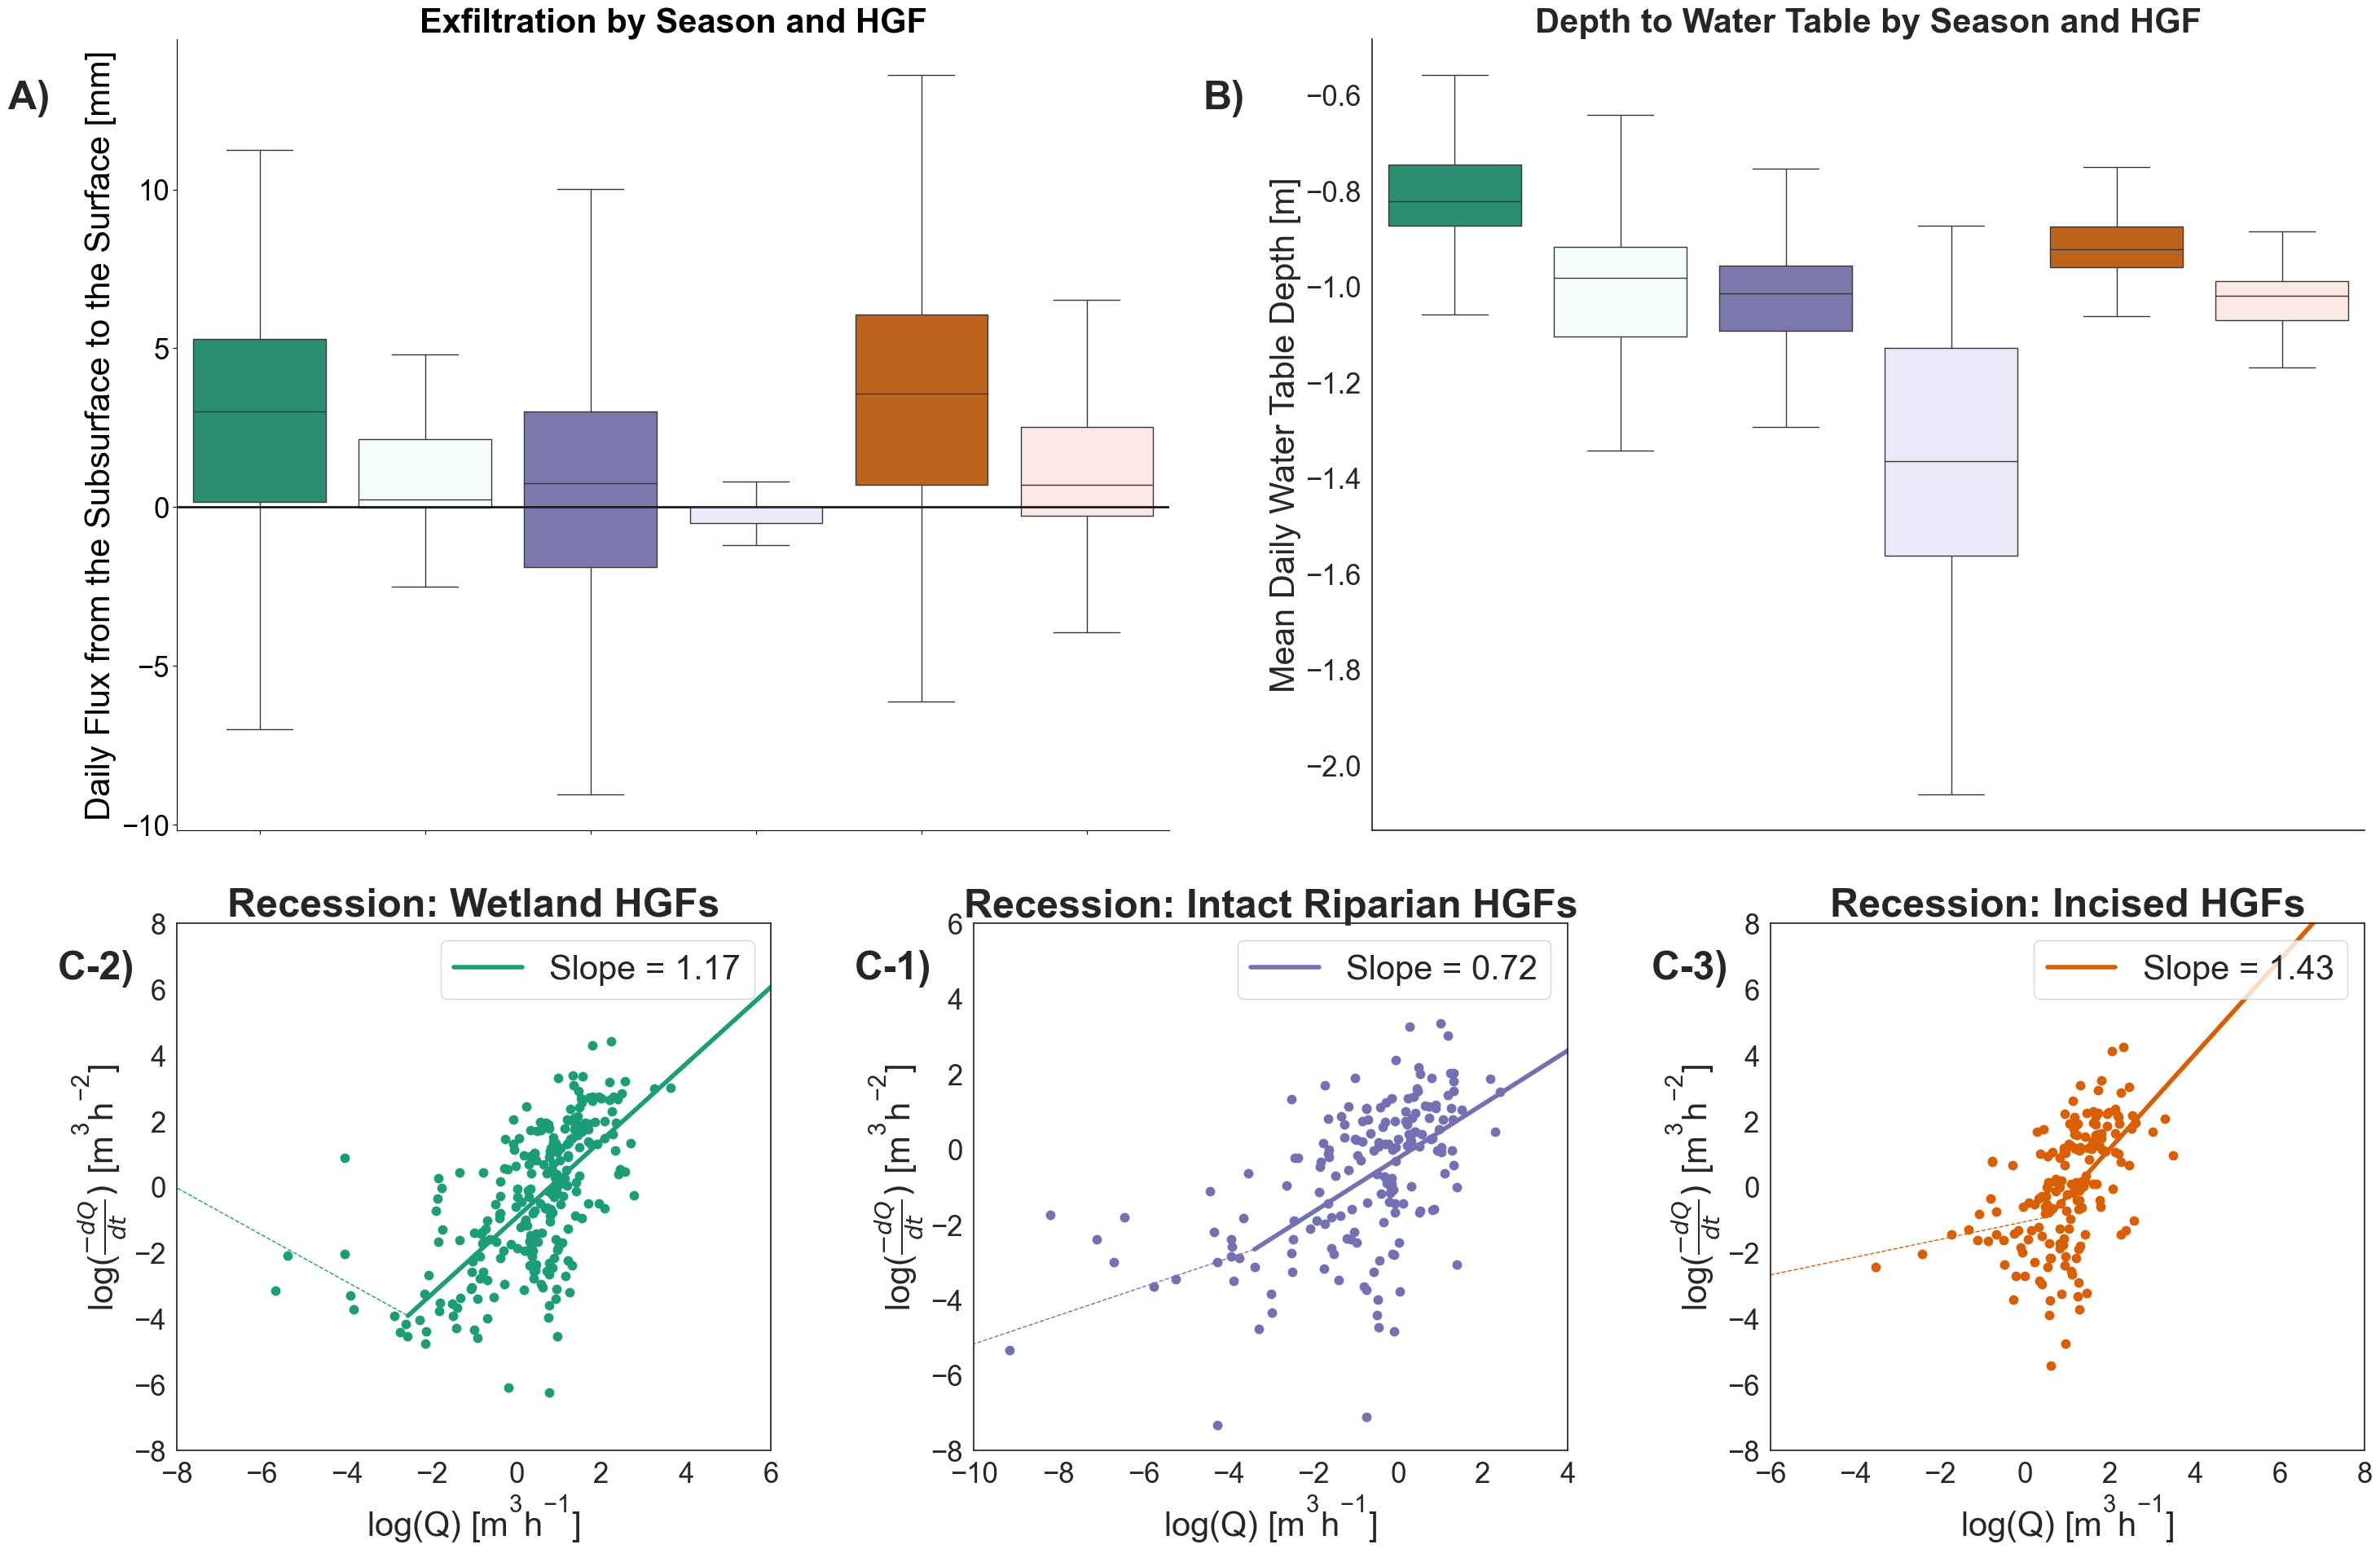

In [26]:
fig